# comparing models behavior with participants behavior

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ["OMP_NUM_THREADS"] = "1"
import seaborn as sns 
import ast
from scipy.stats import pearsonr
from statsmodels.stats.multitest import fdrcorrection
import warnings
warnings.filterwarnings("ignore")


In [2]:
output_dir = r"15_RL_agent_TDlearn_output_behavior"
os.makedirs(output_dir, exist_ok=True)


folder_path_participants = 'data_risk_added'
folder_path_colors = '11_RL_agent_TDlearn_output/model_behavior'
folder_path_numbers = '12_RL_agent_TDlearn_output/model_behavior'
folder_path_colors_numbers = '13_RL_agent_TDlearn_output/model_behavior'


df_participants = []
df_colors = []
df_numbers = []
df_colors_numbers = []


def find_matching_csv(folder_path, df_list):
            for csv_file in os.listdir(folder_path):
                if clean_name in csv_file and csv_file.endswith('.csv'):
                    csv_path = os.path.join(folder_path, csv_file)
                    df_csv = pd.read_csv(csv_path)
                    df_list.append(df_csv)





for file_name in os.listdir(folder_path_participants):
    if file_name.endswith('.xlsx'):
        file_path = os.path.join(folder_path_participants, file_name)
        df = pd.read_excel(file_path)
        df = df[df['outcome'].str.lower() != 'na'].reset_index(drop=True)  
        df_participants.append(df)

        clean_name = file_name.removeprefix("task_data_").removesuffix(".xlsx")


        find_matching_csv(folder_path_colors, df_colors)
        find_matching_csv(folder_path_numbers, df_numbers)
        find_matching_csv(folder_path_colors_numbers, df_colors_numbers)


In [3]:
df_participants[2].head(5)

,arrowRT,distribution,interTrialInterval,outcome,myCard,yourCard,spaceRT,totalReward,trialIndex,trialType,choice,block,timeoutRepeat,risk
0,1067,uniform,894,win,3,9,4575,10.5,0,response,arrowdown,1,0,0.250
1,237,uniform,925,lose,2,1,1903,10.0,1,response,arrowdown,1,0,0.125
2,231,uniform,973,win,8,2,2130,10.5,2,response,arrowup,1,0,0.125
3,602,uniform,768,win,7,2,1537,11.0,3,response,arrowup,1,0,0.250
4,273,uniform,937,win,9,8,1809,11.5,4,response,arrowup,1,0,0.000


In [4]:
df_colors[2].head(5)

,model_choices,participant_choices,model_total_reward,participant_total_reward,q_val
0,0,0,10.5,10.5,"[[0.43389134356196246, 0.017257467260049387], ..."
1,1,0,11.0,10.0,"[[-0.3721534744619285, 0.017257467260049387], ..."
2,1,1,11.5,10.5,"[[-0.3721534744619285, 0.4339142010837617], [0..."
3,1,1,12.0,11.0,"[[-0.3721534744619285, 0.49095308053009257], [..."
4,1,1,12.5,11.5,"[[-0.3721534744619285, 0.4987615077181903], [0..."


In [5]:
df_numbers[2].head()

,model_choices,participant_choices,model_total_reward,participant_total_reward,q_val
0,0,0,10.5,10.5,"[[-0.005786009774610761, -0.000356453847500772..."
1,1,0,11.0,10.0,"[[-0.005786009774610761, -0.000356453847500772..."
2,1,1,11.5,10.5,"[[-0.005786009774610761, -0.000356453847500772..."
3,1,1,12.0,11.0,"[[-0.005786009774610761, -0.000356453847500772..."
4,1,1,12.5,11.5,"[[-0.005786009774610761, -0.000356453847500772..."


In [6]:
df_colors_numbers[2].head(5)

,model_choices,participant_choices,model_total_reward,participant_total_reward,q_val
0,0,0,10.5,10.5,"[[[-0.02043867387785598, -0.000672324798613683..."
1,1,0,11.0,10.0,"[[[-0.02043867387785598, -0.000672324798613683..."
2,1,1,11.5,10.5,"[[[-0.02043867387785598, -0.000672324798613683..."
3,1,1,12.0,11.0,"[[[-0.02043867387785598, -0.000672324798613683..."
4,1,1,12.5,11.5,"[[[-0.02043867387785598, -0.000672324798613683..."


# COLOR abs(delta q values) correlatation with spaceRT and arrowRT

In [7]:
distributions_map = {"uniform": 0, "low": 1, "high": 2}
actions = {"arrowdown": 0, "arrowup": 1}

spaceRT_participants = []
arrowRT_participants = []

delta_q_val_uniform = []
delta_q_val_low = []
delta_q_val_high = []

for df in df_participants:
    spaceRT_normalized = np.array(df['spaceRT'], dtype=float) / np.mean(df['spaceRT'])
    spaceRT_participants.append(spaceRT_normalized)

    arrowRT_normalized = np.array(df['arrowRT'], dtype=float) / np.mean(df['arrowRT'])
    arrowRT_participants.append(arrowRT_normalized)

for df in df_colors:    
    delta_uniform, delta_low, delta_high = [], [], []
    temp_df = df['q_val']

    for q_vals in temp_df:
        temp_vec2 = np.array(ast.literal_eval(q_vals)) 
        delta = temp_vec2[:, actions["arrowup"]] - temp_vec2[:, actions["arrowdown"]]
        delta_uniform.append(delta[distributions_map["uniform"]])
        delta_low.append(delta[distributions_map["low"]])
        delta_high.append(delta[distributions_map["high"]])

    delta_q_val_uniform.append(delta_uniform)
    delta_q_val_low.append(delta_low)
    delta_q_val_high.append(delta_high)


In [8]:
spaceRT_participants = np.array(spaceRT_participants)
arrowRT_participants = np.array(arrowRT_participants)

# importannnttt: it's important that you find the abs value of delta q values
delta_q_val_uniform = np.array(np.abs(delta_q_val_uniform))
delta_q_val_low = np.array(np.abs(delta_q_val_low))
delta_q_val_high = np.array(np.abs(delta_q_val_high))

num_participants = spaceRT_participants.shape[0]

correlations_spaceRT = np.zeros((num_participants, 3))
correlations_arrowRT = np.zeros((num_participants, 3))
p_values_spaceRT = np.zeros((num_participants, 3))
p_values_arrowRT = np.zeros((num_participants, 3))

for i in range(num_participants):
    for j, delta_q_val in enumerate([delta_q_val_uniform, delta_q_val_low, delta_q_val_high]):
        corr, p_val = pearsonr(spaceRT_participants[i, :], delta_q_val[i, :])
        correlations_spaceRT[i, j] = corr
        p_values_spaceRT[i, j] = p_val

        corr, p_val = pearsonr(arrowRT_participants[i, :], delta_q_val[i, :])
        correlations_arrowRT[i, j] = corr
        p_values_arrowRT[i, j] = p_val

####################################################################################################################
####################################################################################################################

correlations_spaceRT = correlations_spaceRT.T
correlations_arrowRT = correlations_arrowRT.T
p_values_spaceRT = p_values_spaceRT.T
p_values_arrowRT = p_values_arrowRT.T

annot_spaceRT = np.array([["*" if p_values_spaceRT[j, i] < 0.05 else "" 
                            for i in range(num_participants)] for j in range(3)])
annot_arrowRT = np.array([["*" if p_values_arrowRT[j, i] < 0.05 else "" 
                            for i in range(num_participants)] for j in range(3)])



fig, axes = plt.subplots(2, 1, figsize=(20, 5), gridspec_kw={'hspace': 0.8})

xticklabels = [f'p{i+1}' for i in range(num_participants)]
yticklabels = ['uniform', 'low', 'high']

sns.heatmap(correlations_spaceRT, cmap='coolwarm', linewidths=0.5,
            xticklabels=xticklabels, yticklabels=yticklabels,
            cbar=True, vmin=-0.4, vmax=0.4, ax=axes[0],
            cbar_kws={'pad': 0.02}, annot=annot_spaceRT, fmt='')
axes[0].set_title("spaceRT", fontsize=14, fontweight='bold')

sns.heatmap(correlations_arrowRT, cmap='coolwarm', linewidths=0.5,
            xticklabels=xticklabels, yticklabels=yticklabels,
            cbar=True, vmin=-0.4, vmax=0.4, ax=axes[1],
            cbar_kws={'pad': 0.02}, annot=annot_arrowRT, fmt='')
axes[1].set_title("arrowRT", fontsize=14, fontweight='bold')

fig.suptitle('Δq-values [q(up)-q(down)] and RTs correlations', fontsize=16, fontweight='bold', y=0.99)


plt.tight_layout(rect=[0, 0, 1, 1])

filename = os.path.join(output_dir, "correlation_qVal_spaceRT_arrowRT_colors.pdf")
plt.savefig(filename, format='pdf')

plt.close()


# NUMBERS abs(delta q values) correlatation with spaceRT and arrowRT 

In [9]:
delta_q_val_1 = []
delta_q_val_2 = []
delta_q_val_3 = []
delta_q_val_4 = []
delta_q_val_5 = []
delta_q_val_6 = []
delta_q_val_7 = []
delta_q_val_8 = []
delta_q_val_9 = []

for df in df_numbers:
    
    delta_1 = []
    delta_2 = []
    delta_3 = []
    delta_4 = []
    delta_5 = []
    delta_6 = []
    delta_7 = []
    delta_8 = []
    delta_9 = []
    
    temp_df = df['q_val']
    for q_vals in temp_df:
        
        temp_vec2 = np.array(ast.literal_eval(q_vals)) 
        delta = temp_vec2[:, actions["arrowup"]] - temp_vec2[:, actions["arrowdown"]]
        delta_1.append(delta[0])
        delta_2.append(delta[1])
        delta_3.append(delta[2])
        delta_4.append(delta[3])
        delta_5.append(delta[4])
        delta_6.append(delta[5])
        delta_7.append(delta[6])
        delta_8.append(delta[7])
        delta_9.append(delta[8])
        
        

    delta_q_val_1.append(delta_1)
    delta_q_val_2.append(delta_2)
    delta_q_val_3.append(delta_3)
    delta_q_val_4.append(delta_4)
    delta_q_val_5.append(delta_5)
    delta_q_val_6.append(delta_6)
    delta_q_val_7.append(delta_7)
    delta_q_val_8.append(delta_8)
    delta_q_val_9.append(delta_9)
        
    


In [10]:
# delta_q_val_1 = np.array(delta_q_val_1)
# delta_q_val_2 = np.array(delta_q_val_2)
# delta_q_val_3 = np.array(delta_q_val_3)
# delta_q_val_4 = np.array(delta_q_val_4)
# delta_q_val_5 = np.array(delta_q_val_5)
# delta_q_val_6 = np.array(delta_q_val_6)
# delta_q_val_7 = np.array(delta_q_val_7)
# delta_q_val_8 = np.array(delta_q_val_8)
# delta_q_val_9 = np.array(delta_q_val_9)

delta_q_val_1 = np.array(np.abs(delta_q_val_1))
delta_q_val_2 = np.array(np.abs(delta_q_val_2))
delta_q_val_3 = np.array(np.abs(delta_q_val_3))
delta_q_val_4 = np.array(np.abs(delta_q_val_4))
delta_q_val_5 = np.array(np.abs(delta_q_val_5))
delta_q_val_6 = np.array(np.abs(delta_q_val_6))
delta_q_val_7 = np.array(np.abs(delta_q_val_7))
delta_q_val_8 = np.array(np.abs(delta_q_val_8))
delta_q_val_9 = np.array(np.abs(delta_q_val_9))

# ─────────────────────────────────────────────────────────────────────────
# 1) Compute correlations for spaceRT
# ─────────────────────────────────────────────────────────────────────────
correlations_numbers_space = np.zeros((num_participants, 9))
correlations_numbers_pval_space = np.zeros((num_participants, 9))

for i in range(num_participants):
    corr, pval = pearsonr(spaceRT_participants[i, :], delta_q_val_1[i, :])
    correlations_numbers_space[i, 0] = corr
    correlations_numbers_pval_space[i, 0] = pval

    corr, pval = pearsonr(spaceRT_participants[i, :], delta_q_val_2[i, :])
    correlations_numbers_space[i, 1] = corr
    correlations_numbers_pval_space[i, 1] = pval

    corr, pval = pearsonr(spaceRT_participants[i, :], delta_q_val_3[i, :])
    correlations_numbers_space[i, 2] = corr
    correlations_numbers_pval_space[i, 2] = pval

    corr, pval = pearsonr(spaceRT_participants[i, :], delta_q_val_4[i, :])
    correlations_numbers_space[i, 3] = corr
    correlations_numbers_pval_space[i, 3] = pval

    corr, pval = pearsonr(spaceRT_participants[i, :], delta_q_val_5[i, :])
    correlations_numbers_space[i, 4] = corr
    correlations_numbers_pval_space[i, 4] = pval

    corr, pval = pearsonr(spaceRT_participants[i, :], delta_q_val_6[i, :])
    correlations_numbers_space[i, 5] = corr
    correlations_numbers_pval_space[i, 5] = pval

    corr, pval = pearsonr(spaceRT_participants[i, :], delta_q_val_7[i, :])
    correlations_numbers_space[i, 6] = corr
    correlations_numbers_pval_space[i, 6] = pval

    corr, pval = pearsonr(spaceRT_participants[i, :], delta_q_val_8[i, :])
    correlations_numbers_space[i, 7] = corr
    correlations_numbers_pval_space[i, 7] = pval

    corr, pval = pearsonr(spaceRT_participants[i, :], delta_q_val_9[i, :])
    correlations_numbers_space[i, 8] = corr
    correlations_numbers_pval_space[i, 8] = pval



correlations_numbers_space = correlations_numbers_space.T
correlations_numbers_pval_space = correlations_numbers_pval_space.T



annots_space = np.array([
    ["*" if correlations_numbers_pval_space[row, col] < 0.05 else "" 
     for col in range(num_participants)]
    for row in range(9)
])

# ─────────────────────────────────────────────────────────────────────────
# 2) Compute correlations for arrowRT
# ─────────────────────────────────────────────────────────────────────────
correlations_numbers_arrow = np.zeros((num_participants, 9))
correlations_numbers_pval_arrow = np.zeros((num_participants, 9))

for i in range(num_participants):
    corr, pval = pearsonr(arrowRT_participants[i, :], delta_q_val_1[i, :])
    correlations_numbers_arrow[i, 0] = corr
    correlations_numbers_pval_arrow[i, 0] = pval

    corr, pval = pearsonr(arrowRT_participants[i, :], delta_q_val_2[i, :])
    correlations_numbers_arrow[i, 1] = corr
    correlations_numbers_pval_arrow[i, 1] = pval

    corr, pval = pearsonr(arrowRT_participants[i, :], delta_q_val_3[i, :])
    correlations_numbers_arrow[i, 2] = corr
    correlations_numbers_pval_arrow[i, 2] = pval

    corr, pval = pearsonr(arrowRT_participants[i, :], delta_q_val_4[i, :])
    correlations_numbers_arrow[i, 3] = corr
    correlations_numbers_pval_arrow[i, 3] = pval

    corr, pval = pearsonr(arrowRT_participants[i, :], delta_q_val_5[i, :])
    correlations_numbers_arrow[i, 4] = corr
    correlations_numbers_pval_arrow[i, 4] = pval

    corr, pval = pearsonr(arrowRT_participants[i, :], delta_q_val_6[i, :])
    correlations_numbers_arrow[i, 5] = corr
    correlations_numbers_pval_arrow[i, 5] = pval

    corr, pval = pearsonr(arrowRT_participants[i, :], delta_q_val_7[i, :])
    correlations_numbers_arrow[i, 6] = corr
    correlations_numbers_pval_arrow[i, 6] = pval

    corr, pval = pearsonr(arrowRT_participants[i, :], delta_q_val_8[i, :])
    correlations_numbers_arrow[i, 7] = corr
    correlations_numbers_pval_arrow[i, 7] = pval

    corr, pval = pearsonr(arrowRT_participants[i, :], delta_q_val_9[i, :])
    correlations_numbers_arrow[i, 8] = corr
    correlations_numbers_pval_arrow[i, 8] = pval


correlations_numbers_arrow = correlations_numbers_arrow.T
correlations_numbers_pval_arrow = correlations_numbers_pval_arrow.T


annots_arrow = np.array([
    ["*" if correlations_numbers_pval_arrow[row, col] < 0.05 else "" 
     for col in range(num_participants)]
    for row in range(9)
])

# ─────────────────────────────────────────────────────────────────────────
# 3) Plot both heatmaps in subplots
# ─────────────────────────────────────────────────────────────────────────
fig, axes = plt.subplots(nrows=2, figsize=(25, 12))


sns.heatmap(
    correlations_numbers_space,
    cmap='coolwarm',
    linewidths=0.5,
    xticklabels=[f'p{i+1}' for i in range(num_participants)],
    yticklabels=list(range(1, 10)),
    cbar=True,
    vmin=-0.4,
    vmax=0.4,
    annot=annots_space,
    fmt='',
    ax=axes[0]
)
# axes[0].set_xlabel("participants")
axes[0].set_ylabel("numbers")
axes[0].set_title("spaceRT")


sns.heatmap(
    correlations_numbers_arrow,
    cmap='coolwarm',
    linewidths=0.5,
    xticklabels=[f'p{i+1}' for i in range(num_participants)],
    yticklabels=list(range(1, 10)),
    cbar=True,
    vmin=-0.4,
    vmax=0.4,
    annot=annots_arrow,
    fmt='',
    ax=axes[1]
)
axes[1].set_xlabel("participants")
axes[1].set_ylabel("numbers")
axes[1].set_title("arrowRT")

fig.suptitle('Δq-values [q(up)-q(down)] and RTs correlations', 
             fontsize=16, fontweight='bold')

filename = os.path.join(output_dir, "correlation_qVal_spaceRT_arrowRT_numbers.pdf")
plt.savefig(filename, format='pdf')
plt.close()


# BOTH abs(delta q values) correlatation with spaceRT and arrowRT 

In [11]:

delta_q_val_1_both = []
delta_q_val_2_both = []
delta_q_val_3_both = []
delta_q_val_4_both = []
delta_q_val_5_both = []
delta_q_val_6_both = []
delta_q_val_7_both = []
delta_q_val_8_both = []
delta_q_val_9_both = []

for df in df_colors_numbers:
    

    delta_1_both = []
    delta_2_both = []
    delta_3_both = []
    delta_4_both = []
    delta_5_both = []
    delta_6_both = []
    delta_7_both = []
    delta_8_both = []
    delta_9_both = []
    
    temp_df = df['q_val']
    for q_vals in temp_df:
        
        temp_vec2 = np.array(ast.literal_eval(q_vals)) 
        delta = temp_vec2[:, :, actions["arrowup"]].squeeze() - temp_vec2[:, :, actions["arrowdown"]].squeeze()
        delta_1_both.append(delta[0][:])
        delta_2_both.append(delta[1][:])
        delta_3_both.append(delta[2][:])
        delta_4_both.append(delta[3][:])
        delta_5_both.append(delta[4][:])
        delta_6_both.append(delta[5][:])
        delta_7_both.append(delta[6][:])
        delta_8_both.append(delta[7][:])
        delta_9_both.append(delta[8][:])
        
        

    delta_q_val_1_both.append(delta_1_both)
    delta_q_val_2_both.append(delta_2_both)
    delta_q_val_3_both.append(delta_3_both)
    delta_q_val_4_both.append(delta_4_both)
    delta_q_val_5_both.append(delta_5_both)
    delta_q_val_6_both.append(delta_6_both)
    delta_q_val_7_both.append(delta_7_both)
    delta_q_val_8_both.append(delta_8_both)
    delta_q_val_9_both.append(delta_9_both)
        
    


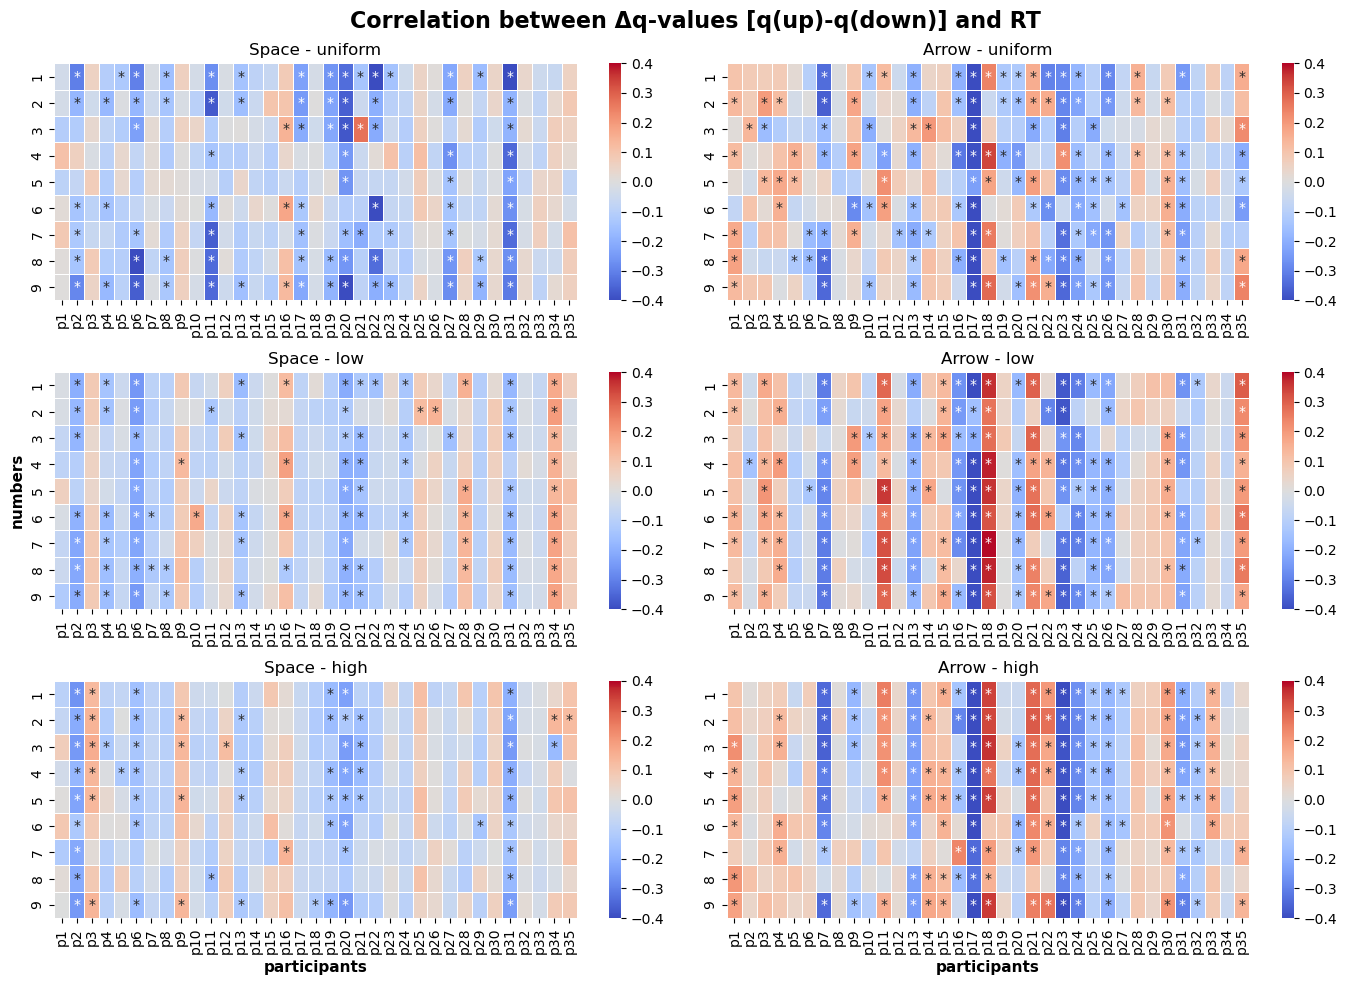

In [12]:

# delta_q_val_1_both = np.array(delta_q_val_1_both)
# delta_q_val_2_both = np.array(delta_q_val_2_both)
# delta_q_val_3_both = np.array(delta_q_val_3_both)
# delta_q_val_4_both = np.array(delta_q_val_4_both)
# delta_q_val_5_both = np.array(delta_q_val_5_both)
# delta_q_val_6_both = np.array(delta_q_val_6_both)
# delta_q_val_7_both = np.array(delta_q_val_7_both)
# delta_q_val_8_both = np.array(delta_q_val_8_both)
# delta_q_val_9_both = np.array(delta_q_val_9_both)

delta_q_val_1_both = np.abs(np.array(delta_q_val_1_both))
delta_q_val_2_both = np.abs(np.array(delta_q_val_2_both))
delta_q_val_3_both = np.abs(np.array(delta_q_val_3_both))
delta_q_val_4_both = np.abs(np.array(delta_q_val_4_both))
delta_q_val_5_both = np.abs(np.array(delta_q_val_5_both))
delta_q_val_6_both = np.abs(np.array(delta_q_val_6_both))
delta_q_val_7_both = np.abs(np.array(delta_q_val_7_both))
delta_q_val_8_both = np.abs(np.array(delta_q_val_8_both))
delta_q_val_9_both = np.abs(np.array(delta_q_val_9_both))



# Create storage for correlations and p-values for each RT type
correlations_space = np.zeros((num_participants, 9, len(distributions_map)))
pvals_space = np.zeros((num_participants, 9, len(distributions_map)))

correlations_arrow = np.zeros((num_participants, 9, len(distributions_map)))
pvals_arrow = np.zeros((num_participants, 9, len(distributions_map)))

# --- Compute Correlations (Space RT) ---
for i in range(num_participants):
    # number 1
    corr = np.corrcoef(spaceRT_participants[i, :],
                       delta_q_val_1_both[i, :, distributions_map["uniform"]])[0, 1]
    correlations_space[i, 0, distributions_map["uniform"]] = corr
    _, pval = pearsonr(spaceRT_participants[i, :],
                       delta_q_val_1_both[i, :, distributions_map["uniform"]])
    pvals_space[i, 0, distributions_map["uniform"]] = pval

    corr = np.corrcoef(spaceRT_participants[i, :],
                       delta_q_val_1_both[i, :, distributions_map["low"]])[0, 1]
    correlations_space[i, 0, distributions_map["low"]] = corr
    _, pval = pearsonr(spaceRT_participants[i, :],
                       delta_q_val_1_both[i, :, distributions_map["low"]])
    pvals_space[i, 0, distributions_map["low"]] = pval

    corr = np.corrcoef(spaceRT_participants[i, :],
                       delta_q_val_1_both[i, :, distributions_map["high"]])[0, 1]
    correlations_space[i, 0, distributions_map["high"]] = corr
    _, pval = pearsonr(spaceRT_participants[i, :],
                       delta_q_val_1_both[i, :, distributions_map["high"]])
    pvals_space[i, 0, distributions_map["high"]] = pval

    # number 2
    corr = np.corrcoef(spaceRT_participants[i, :],
                       delta_q_val_2_both[i, :, distributions_map["uniform"]])[0, 1]
    correlations_space[i, 1, distributions_map["uniform"]] = corr
    _, pval = pearsonr(spaceRT_participants[i, :],
                       delta_q_val_2_both[i, :, distributions_map["uniform"]])
    pvals_space[i, 1, distributions_map["uniform"]] = pval

    corr = np.corrcoef(spaceRT_participants[i, :],
                       delta_q_val_2_both[i, :, distributions_map["low"]])[0, 1]
    correlations_space[i, 1, distributions_map["low"]] = corr
    _, pval = pearsonr(spaceRT_participants[i, :],
                       delta_q_val_2_both[i, :, distributions_map["low"]])
    pvals_space[i, 1, distributions_map["low"]] = pval

    corr = np.corrcoef(spaceRT_participants[i, :],
                       delta_q_val_2_both[i, :, distributions_map["high"]])[0, 1]
    correlations_space[i, 1, distributions_map["high"]] = corr
    _, pval = pearsonr(spaceRT_participants[i, :],
                       delta_q_val_2_both[i, :, distributions_map["high"]])
    pvals_space[i, 1, distributions_map["high"]] = pval

    # number 3
    corr = np.corrcoef(spaceRT_participants[i, :],
                       delta_q_val_3_both[i, :, distributions_map["uniform"]])[0, 1]
    correlations_space[i, 2, distributions_map["uniform"]] = corr
    _, pval = pearsonr(spaceRT_participants[i, :],
                       delta_q_val_3_both[i, :, distributions_map["uniform"]])
    pvals_space[i, 2, distributions_map["uniform"]] = pval

    corr = np.corrcoef(spaceRT_participants[i, :],
                       delta_q_val_3_both[i, :, distributions_map["low"]])[0, 1]
    correlations_space[i, 2, distributions_map["low"]] = corr
    _, pval = pearsonr(spaceRT_participants[i, :],
                       delta_q_val_3_both[i, :, distributions_map["low"]])
    pvals_space[i, 2, distributions_map["low"]] = pval

    corr = np.corrcoef(spaceRT_participants[i, :],
                       delta_q_val_3_both[i, :, distributions_map["high"]])[0, 1]
    correlations_space[i, 2, distributions_map["high"]] = corr
    _, pval = pearsonr(spaceRT_participants[i, :],
                       delta_q_val_3_both[i, :, distributions_map["high"]])
    pvals_space[i, 2, distributions_map["high"]] = pval

    # number 4
    corr = np.corrcoef(spaceRT_participants[i, :],
                       delta_q_val_4_both[i, :, distributions_map["uniform"]])[0, 1]
    correlations_space[i, 3, distributions_map["uniform"]] = corr
    _, pval = pearsonr(spaceRT_participants[i, :],
                       delta_q_val_4_both[i, :, distributions_map["uniform"]])
    pvals_space[i, 3, distributions_map["uniform"]] = pval

    corr = np.corrcoef(spaceRT_participants[i, :],
                       delta_q_val_4_both[i, :, distributions_map["low"]])[0, 1]
    correlations_space[i, 3, distributions_map["low"]] = corr
    _, pval = pearsonr(spaceRT_participants[i, :],
                       delta_q_val_4_both[i, :, distributions_map["low"]])
    pvals_space[i, 3, distributions_map["low"]] = pval

    corr = np.corrcoef(spaceRT_participants[i, :],
                       delta_q_val_4_both[i, :, distributions_map["high"]])[0, 1]
    correlations_space[i, 3, distributions_map["high"]] = corr
    _, pval = pearsonr(spaceRT_participants[i, :],
                       delta_q_val_4_both[i, :, distributions_map["high"]])
    pvals_space[i, 3, distributions_map["high"]] = pval

    # number 5
    corr = np.corrcoef(spaceRT_participants[i, :],
                       delta_q_val_5_both[i, :, distributions_map["uniform"]])[0, 1]
    correlations_space[i, 4, distributions_map["uniform"]] = corr
    _, pval = pearsonr(spaceRT_participants[i, :],
                       delta_q_val_5_both[i, :, distributions_map["uniform"]])
    pvals_space[i, 4, distributions_map["uniform"]] = pval

    corr = np.corrcoef(spaceRT_participants[i, :],
                       delta_q_val_5_both[i, :, distributions_map["low"]])[0, 1]
    correlations_space[i, 4, distributions_map["low"]] = corr
    _, pval = pearsonr(spaceRT_participants[i, :],
                       delta_q_val_5_both[i, :, distributions_map["low"]])
    pvals_space[i, 4, distributions_map["low"]] = pval

    corr = np.corrcoef(spaceRT_participants[i, :],
                       delta_q_val_5_both[i, :, distributions_map["high"]])[0, 1]
    correlations_space[i, 4, distributions_map["high"]] = corr
    _, pval = pearsonr(spaceRT_participants[i, :],
                       delta_q_val_5_both[i, :, distributions_map["high"]])
    pvals_space[i, 4, distributions_map["high"]] = pval

    # number 6
    corr = np.corrcoef(spaceRT_participants[i, :],
                       delta_q_val_6_both[i, :, distributions_map["uniform"]])[0, 1]
    correlations_space[i, 5, distributions_map["uniform"]] = corr
    _, pval = pearsonr(spaceRT_participants[i, :],
                       delta_q_val_6_both[i, :, distributions_map["uniform"]])
    pvals_space[i, 5, distributions_map["uniform"]] = pval

    corr = np.corrcoef(spaceRT_participants[i, :],
                       delta_q_val_6_both[i, :, distributions_map["low"]])[0, 1]
    correlations_space[i, 5, distributions_map["low"]] = corr
    _, pval = pearsonr(spaceRT_participants[i, :],
                       delta_q_val_6_both[i, :, distributions_map["low"]])
    pvals_space[i, 5, distributions_map["low"]] = pval

    corr = np.corrcoef(spaceRT_participants[i, :],
                       delta_q_val_6_both[i, :, distributions_map["high"]])[0, 1]
    correlations_space[i, 5, distributions_map["high"]] = corr
    _, pval = pearsonr(spaceRT_participants[i, :],
                       delta_q_val_6_both[i, :, distributions_map["high"]])
    pvals_space[i, 5, distributions_map["high"]] = pval

    # number 7
    corr = np.corrcoef(spaceRT_participants[i, :],
                       delta_q_val_7_both[i, :, distributions_map["uniform"]])[0, 1]
    correlations_space[i, 6, distributions_map["uniform"]] = corr
    _, pval = pearsonr(spaceRT_participants[i, :],
                       delta_q_val_7_both[i, :, distributions_map["uniform"]])
    pvals_space[i, 6, distributions_map["uniform"]] = pval

    corr = np.corrcoef(spaceRT_participants[i, :],
                       delta_q_val_7_both[i, :, distributions_map["low"]])[0, 1]
    correlations_space[i, 6, distributions_map["low"]] = corr
    _, pval = pearsonr(spaceRT_participants[i, :],
                       delta_q_val_7_both[i, :, distributions_map["low"]])
    pvals_space[i, 6, distributions_map["low"]] = pval

    corr = np.corrcoef(spaceRT_participants[i, :],
                       delta_q_val_7_both[i, :, distributions_map["high"]])[0, 1]
    correlations_space[i, 6, distributions_map["high"]] = corr
    _, pval = pearsonr(spaceRT_participants[i, :],
                       delta_q_val_7_both[i, :, distributions_map["high"]])
    pvals_space[i, 6, distributions_map["high"]] = pval

    # number 8
    corr = np.corrcoef(spaceRT_participants[i, :],
                       delta_q_val_8_both[i, :, distributions_map["uniform"]])[0, 1]
    correlations_space[i, 7, distributions_map["uniform"]] = corr
    _, pval = pearsonr(spaceRT_participants[i, :],
                       delta_q_val_8_both[i, :, distributions_map["uniform"]])
    pvals_space[i, 7, distributions_map["uniform"]] = pval

    corr = np.corrcoef(spaceRT_participants[i, :],
                       delta_q_val_8_both[i, :, distributions_map["low"]])[0, 1]
    correlations_space[i, 7, distributions_map["low"]] = corr
    _, pval = pearsonr(spaceRT_participants[i, :],
                       delta_q_val_8_both[i, :, distributions_map["low"]])
    pvals_space[i, 7, distributions_map["low"]] = pval

    corr = np.corrcoef(spaceRT_participants[i, :],
                       delta_q_val_8_both[i, :, distributions_map["high"]])[0, 1]
    correlations_space[i, 7, distributions_map["high"]] = corr
    _, pval = pearsonr(spaceRT_participants[i, :],
                       delta_q_val_8_both[i, :, distributions_map["high"]])
    pvals_space[i, 7, distributions_map["high"]] = pval

    # number 9
    corr = np.corrcoef(spaceRT_participants[i, :],
                       delta_q_val_9_both[i, :, distributions_map["uniform"]])[0, 1]
    correlations_space[i, 8, distributions_map["uniform"]] = corr
    _, pval = pearsonr(spaceRT_participants[i, :],
                       delta_q_val_9_both[i, :, distributions_map["uniform"]])
    pvals_space[i, 8, distributions_map["uniform"]] = pval

    corr = np.corrcoef(spaceRT_participants[i, :],
                       delta_q_val_9_both[i, :, distributions_map["low"]])[0, 1]
    correlations_space[i, 8, distributions_map["low"]] = corr
    _, pval = pearsonr(spaceRT_participants[i, :],
                       delta_q_val_9_both[i, :, distributions_map["low"]])
    pvals_space[i, 8, distributions_map["low"]] = pval

    corr = np.corrcoef(spaceRT_participants[i, :],
                       delta_q_val_9_both[i, :, distributions_map["high"]])[0, 1]
    correlations_space[i, 8, distributions_map["high"]] = corr
    _, pval = pearsonr(spaceRT_participants[i, :],
                       delta_q_val_9_both[i, :, distributions_map["high"]])
    pvals_space[i, 8, distributions_map["high"]] = pval

# --- Compute Correlations (Arrow RT) ---
for i in range(num_participants):
    # We do exactly the same loop but for arrowRT_participants
    # number 1
    corr = np.corrcoef(arrowRT_participants[i, :],
                       delta_q_val_1_both[i, :, distributions_map["uniform"]])[0, 1]
    correlations_arrow[i, 0, distributions_map["uniform"]] = corr
    _, pval = pearsonr(arrowRT_participants[i, :],
                       delta_q_val_1_both[i, :, distributions_map["uniform"]])
    pvals_arrow[i, 0, distributions_map["uniform"]] = pval

    corr = np.corrcoef(arrowRT_participants[i, :],
                       delta_q_val_1_both[i, :, distributions_map["low"]])[0, 1]
    correlations_arrow[i, 0, distributions_map["low"]] = corr
    _, pval = pearsonr(arrowRT_participants[i, :],
                       delta_q_val_1_both[i, :, distributions_map["low"]])
    pvals_arrow[i, 0, distributions_map["low"]] = pval

    corr = np.corrcoef(arrowRT_participants[i, :],
                       delta_q_val_1_both[i, :, distributions_map["high"]])[0, 1]
    correlations_arrow[i, 0, distributions_map["high"]] = corr
    _, pval = pearsonr(arrowRT_participants[i, :],
                       delta_q_val_1_both[i, :, distributions_map["high"]])
    pvals_arrow[i, 0, distributions_map["high"]] = pval

    # number 2
    corr = np.corrcoef(arrowRT_participants[i, :],
                       delta_q_val_2_both[i, :, distributions_map["uniform"]])[0, 1]
    correlations_arrow[i, 1, distributions_map["uniform"]] = corr
    _, pval = pearsonr(arrowRT_participants[i, :],
                       delta_q_val_2_both[i, :, distributions_map["uniform"]])
    pvals_arrow[i, 1, distributions_map["uniform"]] = pval

    corr = np.corrcoef(arrowRT_participants[i, :],
                       delta_q_val_2_both[i, :, distributions_map["low"]])[0, 1]
    correlations_arrow[i, 1, distributions_map["low"]] = corr
    _, pval = pearsonr(arrowRT_participants[i, :],
                       delta_q_val_2_both[i, :, distributions_map["low"]])
    pvals_arrow[i, 1, distributions_map["low"]] = pval

    corr = np.corrcoef(arrowRT_participants[i, :],
                       delta_q_val_2_both[i, :, distributions_map["high"]])[0, 1]
    correlations_arrow[i, 1, distributions_map["high"]] = corr
    _, pval = pearsonr(arrowRT_participants[i, :],
                       delta_q_val_2_both[i, :, distributions_map["high"]])
    pvals_arrow[i, 1, distributions_map["high"]] = pval

    # number 3
    corr = np.corrcoef(arrowRT_participants[i, :],
                       delta_q_val_3_both[i, :, distributions_map["uniform"]])[0, 1]
    correlations_arrow[i, 2, distributions_map["uniform"]] = corr
    _, pval = pearsonr(arrowRT_participants[i, :],
                       delta_q_val_3_both[i, :, distributions_map["uniform"]])
    pvals_arrow[i, 2, distributions_map["uniform"]] = pval

    corr = np.corrcoef(arrowRT_participants[i, :],
                       delta_q_val_3_both[i, :, distributions_map["low"]])[0, 1]
    correlations_arrow[i, 2, distributions_map["low"]] = corr
    _, pval = pearsonr(arrowRT_participants[i, :],
                       delta_q_val_3_both[i, :, distributions_map["low"]])
    pvals_arrow[i, 2, distributions_map["low"]] = pval

    corr = np.corrcoef(arrowRT_participants[i, :],
                       delta_q_val_3_both[i, :, distributions_map["high"]])[0, 1]
    correlations_arrow[i, 2, distributions_map["high"]] = corr
    _, pval = pearsonr(arrowRT_participants[i, :],
                       delta_q_val_3_both[i, :, distributions_map["high"]])
    pvals_arrow[i, 2, distributions_map["high"]] = pval

    # number 4
    corr = np.corrcoef(arrowRT_participants[i, :],
                       delta_q_val_4_both[i, :, distributions_map["uniform"]])[0, 1]
    correlations_arrow[i, 3, distributions_map["uniform"]] = corr
    _, pval = pearsonr(arrowRT_participants[i, :],
                       delta_q_val_4_both[i, :, distributions_map["uniform"]])
    pvals_arrow[i, 3, distributions_map["uniform"]] = pval

    corr = np.corrcoef(arrowRT_participants[i, :],
                       delta_q_val_4_both[i, :, distributions_map["low"]])[0, 1]
    correlations_arrow[i, 3, distributions_map["low"]] = corr
    _, pval = pearsonr(arrowRT_participants[i, :],
                       delta_q_val_4_both[i, :, distributions_map["low"]])
    pvals_arrow[i, 3, distributions_map["low"]] = pval

    corr = np.corrcoef(arrowRT_participants[i, :],
                       delta_q_val_4_both[i, :, distributions_map["high"]])[0, 1]
    correlations_arrow[i, 3, distributions_map["high"]] = corr
    _, pval = pearsonr(arrowRT_participants[i, :],
                       delta_q_val_4_both[i, :, distributions_map["high"]])
    pvals_arrow[i, 3, distributions_map["high"]] = pval

    # number 5
    corr = np.corrcoef(arrowRT_participants[i, :],
                       delta_q_val_5_both[i, :, distributions_map["uniform"]])[0, 1]
    correlations_arrow[i, 4, distributions_map["uniform"]] = corr
    _, pval = pearsonr(arrowRT_participants[i, :],
                       delta_q_val_5_both[i, :, distributions_map["uniform"]])
    pvals_arrow[i, 4, distributions_map["uniform"]] = pval

    corr = np.corrcoef(arrowRT_participants[i, :],
                       delta_q_val_5_both[i, :, distributions_map["low"]])[0, 1]
    correlations_arrow[i, 4, distributions_map["low"]] = corr
    _, pval = pearsonr(arrowRT_participants[i, :],
                       delta_q_val_5_both[i, :, distributions_map["low"]])
    pvals_arrow[i, 4, distributions_map["low"]] = pval

    corr = np.corrcoef(arrowRT_participants[i, :],
                       delta_q_val_5_both[i, :, distributions_map["high"]])[0, 1]
    correlations_arrow[i, 4, distributions_map["high"]] = corr
    _, pval = pearsonr(arrowRT_participants[i, :],
                       delta_q_val_5_both[i, :, distributions_map["high"]])
    pvals_arrow[i, 4, distributions_map["high"]] = pval

    # number 6
    corr = np.corrcoef(arrowRT_participants[i, :],
                       delta_q_val_6_both[i, :, distributions_map["uniform"]])[0, 1]
    correlations_arrow[i, 5, distributions_map["uniform"]] = corr
    _, pval = pearsonr(arrowRT_participants[i, :],
                       delta_q_val_6_both[i, :, distributions_map["uniform"]])
    pvals_arrow[i, 5, distributions_map["uniform"]] = pval

    corr = np.corrcoef(arrowRT_participants[i, :],
                       delta_q_val_6_both[i, :, distributions_map["low"]])[0, 1]
    correlations_arrow[i, 5, distributions_map["low"]] = corr
    _, pval = pearsonr(arrowRT_participants[i, :],
                       delta_q_val_6_both[i, :, distributions_map["low"]])
    pvals_arrow[i, 5, distributions_map["low"]] = pval

    corr = np.corrcoef(arrowRT_participants[i, :],
                       delta_q_val_6_both[i, :, distributions_map["high"]])[0, 1]
    correlations_arrow[i, 5, distributions_map["high"]] = corr
    _, pval = pearsonr(arrowRT_participants[i, :],
                       delta_q_val_6_both[i, :, distributions_map["high"]])
    pvals_arrow[i, 5, distributions_map["high"]] = pval

    # number 7
    corr = np.corrcoef(arrowRT_participants[i, :],
                       delta_q_val_7_both[i, :, distributions_map["uniform"]])[0, 1]
    correlations_arrow[i, 6, distributions_map["uniform"]] = corr
    _, pval = pearsonr(arrowRT_participants[i, :],
                       delta_q_val_7_both[i, :, distributions_map["uniform"]])
    pvals_arrow[i, 6, distributions_map["uniform"]] = pval

    corr = np.corrcoef(arrowRT_participants[i, :],
                       delta_q_val_7_both[i, :, distributions_map["low"]])[0, 1]
    correlations_arrow[i, 6, distributions_map["low"]] = corr
    _, pval = pearsonr(arrowRT_participants[i, :],
                       delta_q_val_7_both[i, :, distributions_map["low"]])
    pvals_arrow[i, 6, distributions_map["low"]] = pval

    corr = np.corrcoef(arrowRT_participants[i, :],
                       delta_q_val_7_both[i, :, distributions_map["high"]])[0, 1]
    correlations_arrow[i, 6, distributions_map["high"]] = corr
    _, pval = pearsonr(arrowRT_participants[i, :],
                       delta_q_val_7_both[i, :, distributions_map["high"]])
    pvals_arrow[i, 6, distributions_map["high"]] = pval

    # number 8
    corr = np.corrcoef(arrowRT_participants[i, :],
                       delta_q_val_8_both[i, :, distributions_map["uniform"]])[0, 1]
    correlations_arrow[i, 7, distributions_map["uniform"]] = corr
    _, pval = pearsonr(arrowRT_participants[i, :],
                       delta_q_val_8_both[i, :, distributions_map["uniform"]])
    pvals_arrow[i, 7, distributions_map["uniform"]] = pval

    corr = np.corrcoef(arrowRT_participants[i, :],
                       delta_q_val_8_both[i, :, distributions_map["low"]])[0, 1]
    correlations_arrow[i, 7, distributions_map["low"]] = corr
    _, pval = pearsonr(arrowRT_participants[i, :],
                       delta_q_val_8_both[i, :, distributions_map["low"]])
    pvals_arrow[i, 7, distributions_map["low"]] = pval

    corr = np.corrcoef(arrowRT_participants[i, :],
                       delta_q_val_8_both[i, :, distributions_map["high"]])[0, 1]
    correlations_arrow[i, 7, distributions_map["high"]] = corr
    _, pval = pearsonr(arrowRT_participants[i, :],
                       delta_q_val_8_both[i, :, distributions_map["high"]])
    pvals_arrow[i, 7, distributions_map["high"]] = pval

    # number 9
    corr = np.corrcoef(arrowRT_participants[i, :],
                       delta_q_val_9_both[i, :, distributions_map["uniform"]])[0, 1]
    correlations_arrow[i, 8, distributions_map["uniform"]] = corr
    _, pval = pearsonr(arrowRT_participants[i, :],
                       delta_q_val_9_both[i, :, distributions_map["uniform"]])
    pvals_arrow[i, 8, distributions_map["uniform"]] = pval

    corr = np.corrcoef(arrowRT_participants[i, :],
                       delta_q_val_9_both[i, :, distributions_map["low"]])[0, 1]
    correlations_arrow[i, 8, distributions_map["low"]] = corr
    _, pval = pearsonr(arrowRT_participants[i, :],
                       delta_q_val_9_both[i, :, distributions_map["low"]])
    pvals_arrow[i, 8, distributions_map["low"]] = pval

    corr = np.corrcoef(arrowRT_participants[i, :],
                       delta_q_val_9_both[i, :, distributions_map["high"]])[0, 1]
    correlations_arrow[i, 8, distributions_map["high"]] = corr
    _, pval = pearsonr(arrowRT_participants[i, :],
                       delta_q_val_9_both[i, :, distributions_map["high"]])
    pvals_arrow[i, 8, distributions_map["high"]] = pval

# ----------------------------------------------------------
# PLOTTING: 3 rows (uniform, low, high) × 2 columns (space, arrow)
# ----------------------------------------------------------
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 10))  # 3x2 layout
labels = ['uniform', 'low', 'high']

for row_idx, dist_label in enumerate(labels):
    # We'll handle "space" in col=0, "arrow" in col=1
    # 1) SPACE
    ax_space = axes[row_idx, 0]
    # correlations_space has shape (num_participants, 9, 3),
    # so for distribution row_idx, we want correlations_space[:, :, row_idx] => shape (num_participants, 9)
    # We'll transpose for heatmap: shape => (9, num_participants)
    data_space = correlations_space[:, :, distributions_map[dist_label]].T

    # Make an annotation array (same shape) for significance
    annots_space = np.empty((9, num_participants), dtype=object)
    for r in range(9):
        for c in range(num_participants):
            if pvals_space[c, r, distributions_map[dist_label]] < 0.05:
                annots_space[r, c] = '*'
            else:
                annots_space[r, c] = ''

    sns.heatmap(
        data_space,
        ax=ax_space,
        cmap='coolwarm',
        linewidths=0.5,
        xticklabels=[f'p{i+1}' for i in range(num_participants)],
        yticklabels=list(range(1, 10)),
        cbar=True,
        vmin=-0.4, vmax=0.4,
        annot=annots_space, fmt=""
    )
    ax_space.set_title(f"Space - {dist_label}")
    if row_idx == 1:
        ax_space.set_ylabel("numbers", fontsize=11, fontweight='bold')
    if row_idx == 2:
        ax_space.set_xlabel("participants", fontsize=11, fontweight='bold')

    # 2) ARROW
    ax_arrow = axes[row_idx, 1]
    data_arrow = correlations_arrow[:, :, distributions_map[dist_label]].T

    # Make an annotation array (same shape) for significance
    annots_arrow = np.empty((9, num_participants), dtype=object)
    for r in range(9):
        for c in range(num_participants):
            if pvals_arrow[c, r, distributions_map[dist_label]] < 0.05:
                annots_arrow[r, c] = '*'
            else:
                annots_arrow[r, c] = ''

    sns.heatmap(
        data_arrow,
        ax=ax_arrow,
        cmap='coolwarm',
        linewidths=0.5,
        xticklabels=[f'p{i+1}' for i in range(num_participants)],
        yticklabels=list(range(1, 10)),
        cbar=True,
        vmin=-0.4, vmax=0.4,
        annot=annots_arrow, fmt=""
    )
    ax_arrow.set_title(f"Arrow - {dist_label}")
    if row_idx == 2:
        ax_arrow.set_xlabel("participants", fontsize=11, fontweight='bold')

fig.suptitle('Correlation between Δq-values [q(up)-q(down)] and RT', 
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()

# Save the figure (optional)
filename = os.path.join(output_dir, "correlation_qVal_space_arrow_RT_both.pdf")
plt.savefig(filename, format='pdf')
plt.show()
